<a href="https://colab.research.google.com/github/SaiKolapudi/Data-Science-Projects/blob/main/consumer_compaints_LSTM_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.client import device_lib
tf.test.gpu_device_name()

'/device:GPU:0'

In [5]:
df = pd.read_csv('complaints_processed.csv')

In [6]:
df.head()

,Unnamed: 0,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...


In [7]:
# Renaming columns 
df = df.rename(columns={'narrative':'tweet' })

# Removing SNo column
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,product,tweet
0,credit_card,purchase order day shipping amount receive pro...
1,credit_card,forwarded message date tue subject please inve...
2,retail_banking,forwarded message cc sent friday pdt subject f...
3,credit_reporting,payment history missing credit report speciali...
4,credit_reporting,payment history missing credit report made mis...


In [8]:
# Analysing dataframe attributes 
print('* Size of dataframe: {}\n'.format(df.shape))
print('* Datatype of columns are:\n {}\n'.format(df.dtypes))
print('* Count of different product categories:\n {}\n'.format(df['product'].value_counts()))
print('* Number of NaNs among tweets are: {}\n'.format(df['tweet'].isnull().sum())) 

* Size of dataframe: (162421, 2)

* Datatype of columns are:
 product    object
tweet      object
dtype: object

* Count of different product categories:
 credit_reporting       91179
debt_collection        23150
mortgages_and_loans    18990
credit_card            15566
retail_banking         13536
Name: product, dtype: int64

* Number of NaNs among tweets are: 10



In [9]:
# Removing NaNs
df = df.dropna(subset=['tweet'])
print('NaNs are removed from the dataframe. Number of NaNs can be confirmed to be {}. The size of dataframe has reduced to {}'.format(df['tweet'].isnull().sum(), df.shape))

NaNs are removed from the dataframe. Number of NaNs can be confirmed to be 0. The size of dataframe has reduced to (162411, 2)


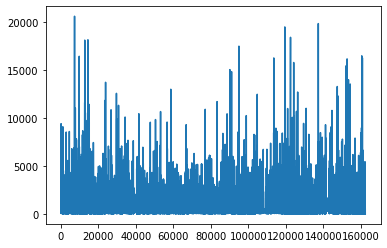

In [10]:
# Plotting word lenghts of tweets
word_length = [len(x) for x in df['tweet']]
plt.plot(word_length)

In [11]:
# Converting sentences to string
df['tweet'] = df['tweet'].astype(str)

In [12]:
# Types of products
df['product'].value_counts()

credit_reporting       91172
debt_collection        23148
mortgages_and_loans    18990
credit_card            15566
retail_banking         13535
Name: product, dtype: int64

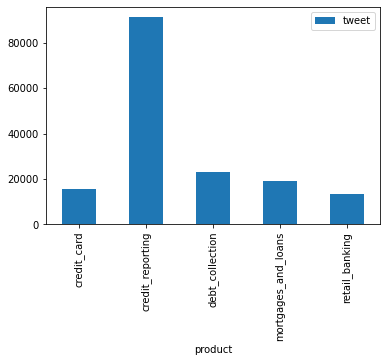

In [13]:
# Plotting product value counts
df.groupby('product').count().plot(kind='bar')
plt.show()

In [14]:
# Importing train test splilt library 
from sklearn.model_selection import train_test_split

# Train-Test Splitting
train_data, test_data = train_test_split(df, test_size = 0.20)

In [15]:
# Train and test data dimensions
train_data.shape, test_data.shape

((129928, 2), (32483, 2))

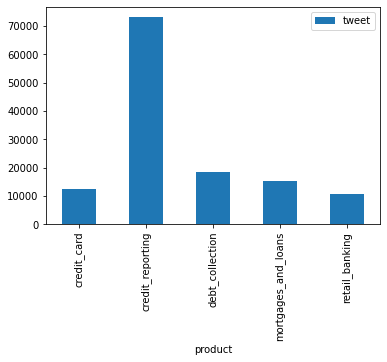

In [16]:
# Balance of train data
train_data.groupby('product').count().plot(kind='bar')
plt.show()

In [17]:
# Train set value counts 
train_data.groupby('product').count()

,tweet
product,
credit_card,12408
credit_reporting,73114
debt_collection,18474
mortgages_and_loans,15170
retail_banking,10762


In [18]:
# Randomly selecting 7000 indices in classes with low value count
import numpy as np
to_add_1 = np.random.choice(train_data[train_data['product']=='credit_card'].index,size = 7000,replace=False)   
to_add_2 = np.random.choice(train_data[train_data['product']=='debt_collection'].index,size = 7000,replace=False) 
to_add_3 = np.random.choice(train_data[train_data['product']=='mortgages_and_loans'].index,size = 7000,replace=False)  
to_add_4 = np.random.choice(train_data[train_data['product']=='retail_banking'].index,size=7000,replace=False)

# Indices to be added
to_add = np.concatenate((to_add_1, to_add_2, to_add_3, to_add_4 ))
len(to_add)

28000

In [19]:
# Forming a dataframe for randomly selected indices
df_replicate = train_data[train_data.index.isin(to_add)]
df_replicate  

,product,tweet
127779,mortgages_and_loans,car paid cancel extended gap service contract ...
120365,debt_collection,pra reporting inaccurate information consumer ...
117267,mortgages_and_loans,called united auto acceptance place one month ...
146394,mortgages_and_loans,trying apply current mortgage company requesti...
102221,retail_banking,wife applied received economic injury disaster...
...,...,...
115206,mortgages_and_loans,filed loan modification application loan servi...
8689,retail_banking,banco popular de puerto rico branch attention ...
118684,credit_card,paypal reporting tradeline never applied consu...
111934,credit_card,husband died hospital citi costco visa credit ...


In [20]:
# Concatenating replicated df to orinigal df
train_data = pd.concat([train_data, df_replicate])
train_data['product'].value_counts()

credit_reporting       73114
debt_collection        25474
mortgages_and_loans    22170
credit_card            19408
retail_banking         17762
Name: product, dtype: int64

In [21]:
# Importing NLTK Libraries
import nltk
from nltk.corpus import stopwords
from nltk import *

In [22]:
# Declaring function for text preprocessing 

def preprocess_text(main_df):
  df_1 = main_df.copy()

  # remove stopwords
  nltk.download('stopwords')         # Downloading stopwords
  stop = stopwords.words('english')  
  df_1['tweet'] = df_1['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop)) 
  
  # remove punctuations and convert to lower case
  df_1['tweet'] = df_1['tweet'].apply(lambda x: re.sub('[!@#$:).;,?&]', '', x.lower()))
  
  # remove double spaces
  df_1['tweet'] = df_1['tweet'].apply(lambda x: re.sub(' ', ' ', x))

  return df_1  

In [23]:
# Preprocessing training and test data 
train_data = preprocess_text(train_data)
test_data = preprocess_text(test_data)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
# Declaring train labels
train_labels = train_data['product'] 
test_labels = test_data['product']

In [25]:
# Converting labels to numerical features
import numpy as np
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_labels)
train_labels = le.transform(train_labels)
test_labels = le.transform(test_labels)

print(le.classes_)
print(np.unique(train_labels, return_counts=True))
print(np.unique(test_labels, return_counts=True))

['credit_card' 'credit_reporting' 'debt_collection' 'mortgages_and_loans'
 'retail_banking']
(array([0, 1, 2, 3, 4]), array([19408, 73114, 25474, 22170, 17762]))
(array([0, 1, 2, 3, 4]), array([ 3158, 18058,  4674,  3820,  2773]))


In [26]:
# Changing labels to categorical features
import numpy as np
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
import numpy as np

train_labels = to_categorical(np.asarray(train_labels))
test_labels = to_categorical(np.array(test_labels))

In [27]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Defining training parameters
max_sequence_length = 170   
max_words = 2500   

# Tokenizing tweets/sentences wrt num_words
tokenizer = Tokenizer(num_words = max_words)  # Selects most frequent words 
tokenizer.fit_on_texts(train_data.tweet)      # Develops internal vocab based on training text
train_sequences = tokenizer.texts_to_sequences(train_data.tweet)  # converts text to sequence

test_sequences = tokenizer.texts_to_sequences(test_data.tweet)

In [28]:
# Fixing the sequence length 
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_data = pad_sequences(train_sequences, maxlen = max_sequence_length)
test_data = pad_sequences(test_sequences, maxlen = max_sequence_length)
train_data.shape, test_data.shape

((157928, 170), (32483, 170))

In [29]:
# Model Parameters
embedding_dim = 32

In [30]:
# Importing Libraries

import tensorflow as tf
import sys, os, re, csv, codecs, numpy as np, pandas as pd
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D, Conv1D, SimpleRNN
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers
from tensorflow.keras.layers import Dense, Input, Input, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding 

In [31]:
embedding_dim = 32  

# Model Training
model = Sequential()
model.add(Embedding(max_words, 
                   embedding_dim,
                   input_length=max_sequence_length))

# Bidirectional LSTM 
model.add(Bidirectional(LSTM(16, return_sequences=True, dropout=0.4, recurrent_dropout=0)))   

model.add(GlobalMaxPool1D())

model.add(Dense(5,activation='softmax'))  

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 170, 32)           80000     
                                                                 
 bidirectional (Bidirectiona  (None, 170, 32)          6272      
 l)                                                              
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 5)                 165       
                                                                 
Total params: 86,437
Trainable params: 86,437
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(loss = 'binary_crossentropy', optimizer='RMSProp', metrics = ['accuracy']) 

In [33]:
# declaring weights of product categories
class_weight = {0: 4,          
                1: 5,    
                2: 3,      
                3: 3,     
                4: 4}      

# training and validating model 
history = model.fit(train_data, train_labels, batch_size=48, epochs= 20, class_weight = class_weight, validation_data=(test_data, test_labels)) # best 89(now) or 48 or 60 epochs # default epochs = 23 # batch_size changed to 1 (takes 2.30hrs) from 16

Epoch 1/20
3291/3291 [==============================] - 74s 19ms/step - loss: 0.9300 - accuracy: 0.7405 - val_loss: 0.1591 - val_accuracy: 0.8511
Epoch 2/20
3291/3291 [==============================] - 62s 19ms/step - loss: 0.6075 - accuracy: 0.8494 - val_loss: 0.1486 - val_accuracy: 0.8605
Epoch 3/20
3291/3291 [==============================] - 62s 19ms/step - loss: 0.5714 - accuracy: 0.8567 - val_loss: 0.1424 - val_accuracy: 0.8654
Epoch 4/20
3291/3291 [==============================] - 62s 19ms/step - loss: 0.5534 - accuracy: 0.8602 - val_loss: 0.1454 - val_accuracy: 0.8609
Epoch 5/20
3291/3291 [==============================] - 62s 19ms/step - loss: 0.5421 - accuracy: 0.8623 - val_loss: 0.1374 - val_accuracy: 0.8669
Epoch 6/20
3291/3291 [==============================] - 62s 19ms/step - loss: 0.5327 - accuracy: 0.8653 - val_loss: 0.1362 - val_accuracy: 0.8689
Epoch 7/20
3291/3291 [==============================] - 62s 19ms/step - loss: 0.5233 - accuracy: 0.8669 - val_loss: 0.1355 -

In [34]:
# Prediction on Test Data
predicted_bi_lstm = model.predict(test_data)
predicted_bi_lstm

array([[4.1165608e-06, 9.9958354e-01, 4.0986727e-04, 1.6343067e-06,
        8.4338473e-07],
       [4.5504967e-06, 9.9998832e-01, 5.9718595e-06, 6.9607125e-07,
        4.4861409e-07],
       [3.1543724e-04, 8.8150112e-04, 9.8831314e-01, 7.0093321e-03,
        3.4806689e-03],
       ...,
       [3.7286268e-06, 9.9997246e-01, 1.8189969e-05, 5.1833545e-06,
        4.8872664e-07],
       [7.9885544e-03, 6.8352610e-01, 3.0424502e-01, 2.4113571e-03,
        1.8289455e-03],
       [2.4827139e-03, 1.6032777e-03, 9.9492896e-01, 8.7523478e-04,
        1.0999842e-04]], dtype=float32)

In [35]:
## Model Evaluation

import sklearn
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(test_labels, predicted_bi_lstm.round())

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))
print('################################')
print(sklearn.metrics.classification_report(test_labels, predicted_bi_lstm.round()))

precision: [0.78915663 0.9158518  0.83509202 0.86664811 0.84586466]
recall: [0.78815706 0.93360284 0.72807018 0.81492147 0.89253516]
fscore: [0.78865653 0.92464213 0.77791748 0.83998921 0.86857343]
support: [ 3158 18058  4674  3820  2773]
################################
              precision    recall  f1-score   support

           0       0.79      0.79      0.79      3158
           1       0.92      0.93      0.92     18058
           2       0.84      0.73      0.78      4674
           3       0.87      0.81      0.84      3820
           4       0.85      0.89      0.87      2773

   micro avg       0.88      0.87      0.88     32483
   macro avg       0.85      0.83      0.84     32483
weighted avg       0.88      0.87      0.88     32483
 samples avg       0.87      0.87      0.87     32483



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


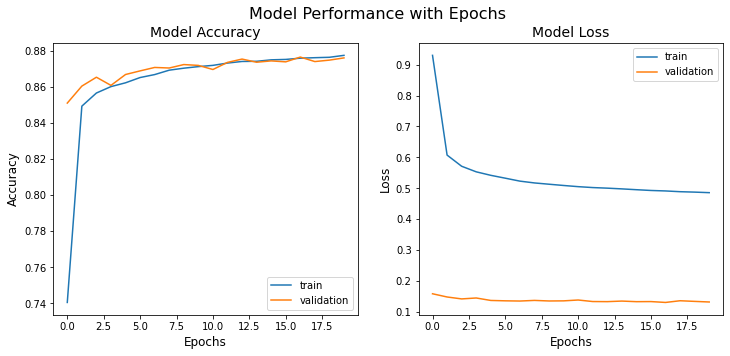

In [37]:
##  Model Performance

def accuracy_plot(history):
    
    fig, ax = plt.subplots(1, 2, figsize=(12,5))
    
    fig.suptitle('Model Performance with Epochs', fontsize = 16)
    # Subplot 1 
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy', fontsize = 14)
    ax[0].set_xlabel('Epochs', fontsize = 12)
    ax[0].set_ylabel('Accuracy', fontsize = 12)
    ax[0].legend(['train', 'validation'], loc='best')
    
    # Subplot 2
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss', fontsize = 14)
    ax[1].set_xlabel('Epochs', fontsize = 12)
    ax[1].set_ylabel('Loss', fontsize = 12)
    ax[1].legend(['train', 'validation'], loc='best')
    
    
accuracy_plot(history)